# [KDT] ch3 가설 검정

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파일 로딩 
df_hk = pd.read_csv('.\\data\hk_221206.csv')
df_hk.head(5)

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [3]:
# Data type을 살펴보고 EDA를 수행 
df_hk.describe()

,height,age,salary,expenditure
count,250.000000,250.000000,250.000000,250.000000
mean,169.569200,39.240000,6357.480000,4971.480000
std,12.283857,8.653899,1849.791383,1861.112508
min,148.100000,20.000000,3080.000000,1330.000000
25%,159.300000,33.000000,5002.500000,3593.750000
50%,168.750000,39.000000,6100.000000,4762.500000
75%,180.375000,46.000000,7427.500000,6272.500000
max,191.800000,55.000000,11990.000000,10865.000000


## 1 sample t-test

$ H_0 : \mu = \mu_0$

$ H_1 : \mu \neq \mu_0$

In [4]:
# 1 sample t-test
df_hk['age']

0      22
1      31
2      55
3      28
4      29
       ..
245    50
246    51
247    52
248    53
249    54
Name: age, Length: 250, dtype: int64

In [5]:
# t-test를 할 data의 mean
df_hk['age'].mean()

39.24

In [6]:
# describe


<AxesSubplot:ylabel='Frequency'>

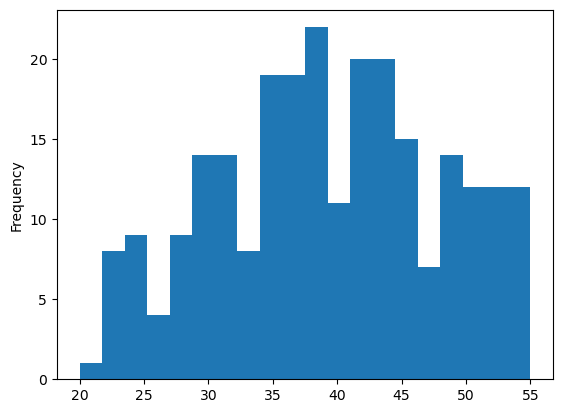

In [7]:
# age의 histogram
df_hk['age'].plot.hist(bins = 20)

In [8]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰 , 39.24
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=30) 

Ttest_1sampResult(statistic=16.882244149646134, pvalue=3.847271424260211e-43)

In [9]:
3.847271424260211e-43 < 0.05

True

In [10]:
ttest_1samp(df_hk['age'], popmean=38) 

Ttest_1sampResult(statistic=2.265582548220913, pvalue=0.024336341875188777)

In [11]:
ttest_1samp(df_hk['age'], popmean=38.5) 
ttest_1samp(df_hk['age'], popmean=38.5)[1] < 0.05 # 귀무가설 채택, 같다, 95% 신뢰수준에서

False

In [12]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
ttest_1samp(df_hk['age'], popmean=39) 
# ttest_1samp(df_hk['age'], popmean=39)[1] < 0.05

Ttest_1sampResult(statistic=0.43849984804276027, pvalue=0.6614041860727076)

In [13]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
ttest_1samp(df_hk['age'], popmean=39.24) 

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [14]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰


### 2 sample t-test


$ H_0 : \mu_0 = \mu_1$

$ H_1 : \mu_0 \neq \mu_1$

In [15]:
# A,B,C회사 연봉 평균

salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()

print('salary_a = ', salary_a)
print('salary_b = ', salary_b)
print('salary_c = ', salary_c)

salary_a =  6522.5
salary_b =  5364.4
salary_c =  8013.6


In [16]:
# 2 sample t-test (A=B)
from scipy.stats import ttest_ind

a = df_hk[df_hk['company'] == 'A'].salary
b = df_hk[df_hk['company'] == 'B'].salary

ttest_ind(a, b)

Ttest_indResult(statistic=5.941362455469809, pvalue=1.2532322871358408e-08)

In [17]:
# 2 sample t-test (A>=B) less

ttest_ind(a, b, alternative='less') # A > B   # B가 기준,  Ho: B가 작다     # Ho 채택 -> B가 작다고 볼 수 있다

Ttest_indResult(statistic=5.941362455469809, pvalue=0.9999999937338386)

In [18]:
# 2 sample t-test (A<=B) greater
ttest_ind(a, b, alternative='greater')  # A < B   B가 기준,  Ho: B가 크다     # Ho 기각 -> B가 크다고 볼 수 없다

Ttest_indResult(statistic=5.941362455469809, pvalue=6.266161435679204e-09)

# 3/2 18:00

-----------------------------------------------------------------------

## Quiz 1

1) iris 데이터를 사용하여('iris.csv') species column 'virginica'의 'sepal_width' 모평균이 3.14와 같은지 가설을 수립하고 
   유의수준 0.05에서 검정하시오

2) 'setosa'와 'versicolor'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

In [19]:
# 파일 로딩 
df_iris = pd.read_csv('.\\data\iris.csv')
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
df_iris.groupby(['species']).sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [21]:
# 가설검정
# H0 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 없다 (유의수준 0.05)

In [22]:
from scipy.stats import ttest_1samp, ttest_ind

df_iris[df_iris['species'] == 'virginica'].sepal_width   
ttest_1samp(df_iris[df_iris['species'] == 'virginica'].sepal_width, popmean = 3.14) # H0 기각

Ttest_1sampResult(statistic=-3.6397193577606113, pvalue=0.000656333824892921)

In [23]:
# 가설검정
# H0 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 없다 (유의수준 0.05)

In [24]:
from scipy.stats import ttest_1samp, ttest_ind

se = df_iris[df_iris['species'] == 'setosa'].sepal_length
ve = df_iris[df_iris['species'] == 'versicolor'].sepal_length
ttest_ind(se,ve) # H0 기각

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

# 10시 10분에 시작하겠습니다

-----------------------------------------------------------------------

## ANOVA

$ H_0 : \mu_1 = \mu_2 = \mu_3$

$ H_1 : \mu_1 \neq \mu_2  \quad or  \quad  \mu_2 \neq \mu_3  \quad   or  \quad  \mu_1 \neq \mu_3$

In [25]:
# A,B,C회사 연봉 평균이 같은지 검정
salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()

print('salary_a = ', salary_a)
print('salary_b = ', salary_b)
print('salary_c = ', salary_c)

salary_a =  6522.5
salary_b =  5364.4
salary_c =  8013.6


In [26]:
# ANOVA scipy.stats 사용
from scipy.stats import f_oneway

a = df_hk[df_hk['company'] == 'A'].salary
b = df_hk[df_hk['company'] == 'B'].salary
c = df_hk[df_hk['company'] == 'C'].salary

f_oneway(a,b,c)

F_onewayResult(statistic=48.004778211948, pvalue=2.44205573896896e-18)

In [27]:
# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols(formula = 'salary ~ company', data  =df_hk).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
company,2.0,238480621.4,1.192403e+08,48.004778,2.442056e-18
Residual,247.0,613529691.0,2.483926e+06,NaN,NaN


<AxesSubplot:xlabel='company', ylabel='salary'>

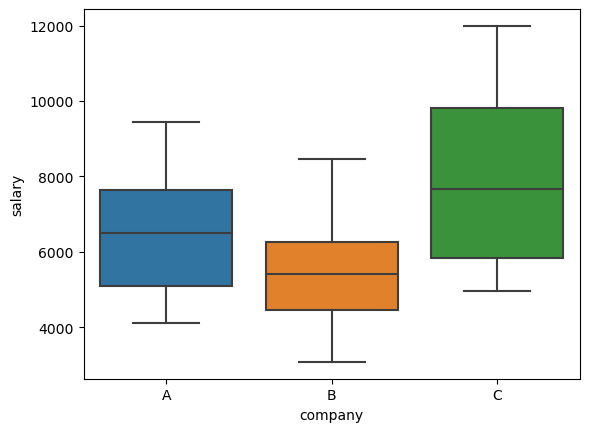

In [28]:
# 시각화 box plot
sns.boxplot(x= 'company', y= 'salary', data = df_hk)

In [29]:
# ANOVA 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df_hk['salary'], df_hk['company'], alpha = 0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj   lower      upper   reject
--------------------------------------------------------
     A      B  -1158.1   0.0 -1683.6515 -632.5485   True
     A      C   1491.1   0.0   847.4334 2134.7666   True
     B      C   2649.2   0.0  2005.5334 3292.8666   True
--------------------------------------------------------


In [30]:
df_hk['grades'].unique()

array(['A', 'B', 'F', 'C', 'D'], dtype=object)

In [31]:
# grades별 연봉 평균
# ANOVA scipy.stats 사용

a1 = df_hk[df_hk['grades'] == 'A'].salary
b1 = df_hk[df_hk['grades'] == 'B'].salary
c1 = df_hk[df_hk['grades'] == 'C'].salary
d1 = df_hk[df_hk['grades'] == 'D'].salary
f1 = df_hk[df_hk['grades'] == 'F'].salary

f_oneway(a1,b1,c1,d1,f1)

F_onewayResult(statistic=0.8236712902602736, pvalue=0.5111463584243117)

In [32]:
# pairwise_tukeyhsd 확인
posthoc1 = pairwise_tukeyhsd(df_hk['salary'], df_hk['grades'], alpha = 0.05)
print(posthoc1)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B   296.6117 0.8076  -446.0004 1039.2238  False
     A      C   240.0277 0.9721  -826.7163 1306.7717  False
     A      D   151.5902 0.9983 -1244.0566  1547.237  False
     A      F  -834.2134  0.784 -2841.7982 1173.3715  False
     B      C   -56.5841 0.9999 -1073.0998  959.9317  False
     B      D  -145.0216 0.9984 -1502.6635 1212.6203  False
     B      F -1130.8251 0.5191 -3112.1778  850.5276  False
     C      D   -88.4375 0.9999 -1647.1747 1470.2997  False
     C      F -1074.2411 0.6348 -3198.4418 1049.9596  False
     D      F  -985.8036  0.766 -3292.7747 1321.1676  False
-----------------------------------------------------------


In [33]:
# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols(formula = 'salary ~ grades', data  =df_hk).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
grades,4.0,1.130554e+07,2.826385e+06,0.823671,0.511146
Residual,245.0,8.407048e+08,3.431448e+06,NaN,NaN


## Quiz 2

1) 'setosa' , 'versicolor', 'virginica'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

3) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [34]:
# 파일 로딩 
df_iris = pd.read_csv('.\\data\iris.csv')
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
# 가설검정
# H0 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 셋 중 어느 하나는 다르다고 볼 수 있다 (유의수준 0.05)

In [36]:
# ANOVA scipy.stats 사용
from scipy.stats import f_oneway

sl_se = df_iris[df_iris['species'] == 'setosa'].sepal_length
sl_ve = df_iris[df_iris['species'] == 'versicolor'].sepal_length
sl_vi = df_iris[df_iris['species'] == 'virginica'].sepal_length

f_oneway(sl_se, sl_ve, sl_vi)    # H0 기각 -> 모두 같다고 볼 수 없다, (유의수준0.05), 어느 하나는 다르다 

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

In [37]:
# ANOVA statsmodels 사용
model2 = ols(formula = 'sepal_length ~ species', data = df_iris).fit()
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,63.212133,31.606067,119.264502,1.669669e-31
Residual,147.0,38.956200,0.265008,NaN,NaN


In [38]:
# ANOVA 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df_iris['sepal_length'], df_iris['species'], alpha = 0.05)
print(posthoc)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


## Quiz 3

1) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [39]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\bike.csv')
df_bike.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
# 요일변수 생성
import datetime as dt
pd.to_datetime(df_bike['datetime']).dt.weekday
pd.to_datetime(df_bike['datetime']).dt.day_name()
df_bike['date'] = pd.to_datetime(df_bike['datetime']).dt.day_name()
df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday


In [41]:
# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols(formula = 'registered ~ date', data = df_bike).fit()
anova_lm(model)# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [42]:
# ANOVA 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df_bike['registered'], df_bike['date'], alpha = 0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1    group2  meandiff p-adj   lower    upper   reject
-----------------------------------------------------------
  Friday    Monday  -6.2956 0.9074 -22.2386   9.6473  False
  Friday  Saturday  -33.802    0.0 -49.6623 -17.9417   True
  Friday    Sunday -43.0539    0.0 -58.9265 -27.1813   True
  Friday  Thursday   6.4467 0.8971  -9.4911  22.3846  False
  Friday   Tuesday  -0.0977    1.0 -16.0715  15.8761  False
  Friday Wednesday  -0.9526    1.0 -16.8956  14.9903  False
  Monday  Saturday -27.5063    0.0 -43.3093 -11.7034   True
  Monday    Sunday -36.7583    0.0 -52.5736 -20.9429   True
  Monday  Thursday  12.7424 0.2132  -3.1384  28.6232  False
  Monday   Tuesday   6.1979  0.913   -9.719  22.1148  False
  Monday Wednesday    5.343 0.9559 -10.5429  21.2289  False
Saturday    Sunday  -9.2519 0.5929 -24.9839   6.4801  False
Saturday  Thursday  40.2487    0.0  24.4509  56.0465   True
Saturday   Tuesday  33.7042    0.0  17.8

## 상관분석

In [43]:
# 파일 로딩
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [44]:
# Correlation analysis
df_hk.corr(method = 'spearman')

,height,age,salary,expenditure
height,1.000000,0.039065,0.060429,0.064053
age,0.039065,1.000000,0.616263,0.622084
salary,0.060429,0.616263,1.000000,0.966877
expenditure,0.064053,0.622084,0.966877,1.000000


In [45]:
# pearsonr, spearmanr, kendalltau
from scipy.stats import spearmanr
spearmanr(df_hk['age'], df_hk['salary'])

SpearmanrResult(correlation=0.616262693087095, pvalue=1.539637811022021e-27)

In [46]:
# pearsonr
from scipy.stats import pearsonr
pearsonr(df_hk['age'], df_hk['salary'])

PearsonRResult(statistic=0.5250345123258027, pvalue=4.0964819870216607e-19)

In [47]:
# spearmanr
from scipy.stats import spearmanr
spearmanr(df_hk['age'], df_hk['salary'])

SpearmanrResult(correlation=0.616262693087095, pvalue=1.539637811022021e-27)

In [48]:
# kendalltau
from scipy.stats import kendalltau
kendalltau(df_hk['age'], df_hk['salary'])

KendalltauResult(correlation=0.4873172555182334, pvalue=1.1307798230320081e-29)

<AxesSubplot:xlabel='age', ylabel='salary'>

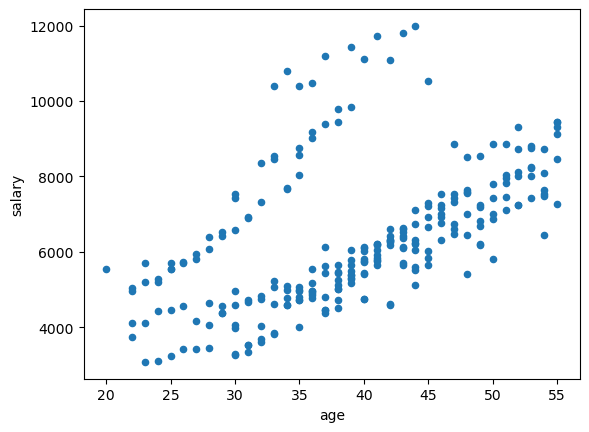

In [49]:
# scatterplot 시각화
df_hk.plot.scatter(x='age', y='salary')

## Quiz 4

bike 데이터(bike.cvs)를 사용하여

1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?

2) season별로 자전거 총 대여 숫자(count)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오 

3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?

In [50]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\bike.csv')
df_bike[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [51]:
# 1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?
df_bike[['temp', 'atemp', 'humidity', 'registered']].corr()

,temp,atemp,humidity,registered
temp,1.000000,0.984948,-0.064949,0.318571
atemp,0.984948,1.000000,-0.043536,0.314635
humidity,-0.064949,-0.043536,1.000000,-0.265458
registered,0.318571,0.314635,-0.265458,1.000000


In [52]:
# 2) season별로 atemp와 자전거 대여 숫자(casual)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오

df_bike[['season','atemp', 'casual']].groupby('season').corr()  #season 1, 0.478312 

atemp    casual
season                           
1      atemp   1.000000  0.478312
       casual  0.478312  1.000000
2      atemp   1.000000  0.378122
       casual  0.378122  1.000000
3      atemp   1.000000  0.381423
       casual  0.381423  1.000000
4      atemp   1.000000  0.443751
       casual  0.443751  1.000000

In [53]:
# 추가) 정리하여 보려면

corr_temp = df_bike[['season','atemp', 'casual']].groupby('season').corr().reset_index()
corr_temp = corr_temp[corr_temp['atemp'] < 1]
corr_temp.sort_values(['atemp'], ascending= False)

,season,level_1,atemp,casual
1,1,casual,0.478312,1.0
7,4,casual,0.443751,1.0
5,3,casual,0.381423,1.0
3,2,casual,0.378122,1.0


In [54]:
# 3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?

(df_bike['weather'] == 1)+0
df_bike['weather_1'] = (df_bike['weather'] == 1)+0
df_bike
df_bike[['temp', 'casual', 'weather_1']].groupby('weather_1').corr()

temp    casual
weather_1                           
0         temp    1.000000  0.446361
          casual  0.446361  1.000000
1         temp    1.000000  0.471053
          casual  0.471053  1.000000

In [55]:
round(0.471053 - 0.446361, 3)

0.025

# 13:05분에 시작하겠습니다

## 카이스퀘어 검정

$H_0:$ 두 변수는 서로 독립임 (연관이 없음)

$H_1:$ 두 변수는 서로 독립이 아님 (연관이 있음)

In [56]:
# 파일 로딩
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [57]:
# chi-squared test 1, gender company
from scipy.stats import chi2_contingency

cross = pd.crosstab(df_hk['gender'], df_hk['company'])
cross

company,A,B,C
gender,,,
F,40,47,25
M,60,53,25


In [58]:
# chi2_contingency
chi2_contingency(cross)

(1.674107142857143,
 0.43298440342651534,
 2,
 array([[44.8, 44.8, 22.4],
        [55.2, 55.2, 27.6]]))

In [59]:
# chi-squared test 2
cross1 = pd.crosstab(df_hk['gender'], df_hk['grades'])
cross1

grades,A,B,C,D,F
gender,,,,,
F,40,52,10,8,2
M,39,64,22,8,5


In [60]:
chi2_contingency(cross1)

(4.3831600833689315,
 0.35662732977015354,
 4,
 array([[35.392, 51.968, 14.336,  7.168,  3.136],
        [43.608, 64.032, 17.664,  8.832,  3.864]]))

## Quiz 5

bike 데이터(bike.cvs)를 사용하여

1) season과 weather dtype을 문자형으로 변환하고 

   두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오  

2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
   count_high와 workingday의 독립성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)

# 13:40 까지

In [61]:
# 파일 로딩 
df_bike[:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_1
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [62]:
df_bike['count'].quantile(0.3)

61.0

In [63]:
df_bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
weather_1       int32
dtype: object

In [64]:
# 1) season과 weather dtype을 문자형으로 변환하고
#    두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오
df_bike['season'] = df_bike['season'].astype('object')
df_bike['weather'] = df_bike['weather'].astype('object')

cross2 =  pd.crosstab(df_bike['season'], df_bike['weather'] )
chi2_contingency(cross2)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [65]:
# 2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
#    count_high와 workingday의 연관성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)

df_bike['count_high'] = np.where(df_bike['count'] >=  df_bike['count'].quantile(0.3), 'high', 'low')
    
cross3 = pd.crosstab(df_bike['count_high'] , df_bike['workingday']  )
chi2, p, dof, exp = chi2_contingency(cross3)
print(round(chi2, 3))


1.134


## Quiz 6

<br>교육 전문기관 분석팀에서는 교육 수강자의 정보를 바탕으로 진로설계 프로그램을 운영하기 위해 다음 정보를 수집하였다.
<br>DS_Sample_2.csv (구분자: comma(“,”), 19,158 Rows, 15 Columns, UTF-8 인코딩)

<br>분석을 수행하기 전, 상기 데이터를 이용하여 아래의 전처리를 수행하시오.

<br>단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오.
<br>단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.
<br>단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.
<br>단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.

<br>상기 전처리를 완료한 데이터셋(데이터셋명: job2, 7,522 Rows)을 이용하여 다음 문제에 답하시오.

<br>(job2를 이용하여) ‘관련 분야 경험 여부(relevant_experience)’에 따른 ‘이직 희망 여부(target)’를 기술통계량으로 확인하고자 한다.
<br>관련 분야 경험이 없는(relevant_experience=‘No relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 A,
<br>관련 분야 경험이 있는(relevant_experience=’Has relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 B라 할때, A/B를 구하시오.
-	소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오.
<br>(답안예시) 12.34


# 14:10분 시작하겠습니다.

In [66]:
# 파일 로딩
df_q6 = pd.read_csv('.\\data\\DS_Sample_2.csv')
df_q6[:2]

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Xgrp
0,8949.0,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1.0,train
1,29725.0,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0,train


In [67]:
# 단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오
df_q6 = df_q6.drop(['city', 'company_size', 'company_type'], axis=1)

In [68]:
# 단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.
# df_q6.dropna(subset=df_q6.dtypes[(df_q6.dtypes == 'object')].index.tolist())  #  문자형 열 list후 drop
df_q6 = df_q6.dropna()

In [69]:
# 단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.
df_q6['experience'].value_counts()
df_q6 = df_q6[~df_q6['experience'].isin(['>20', '<1'])]
# df_q6[~((df_q6['experience'] == '>20') | (df_q6['experience'] == '<1'))]

df_q6['experience'] = df_q6['experience'].astype('int')

In [70]:
# 단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.
df_q6['last_new_job'].value_counts()
df_q6 = df_q6[~df_q6['last_new_job'].isin(['>4', 'never'])]
df_q6['last_new_job'] = df_q6['last_new_job'].astype('int')

In [71]:
pd.crosstab(df_q6['relevant_experience'], df_q6['target'])

target,0.0,1.0
relevant_experience,,
Has relevant experience,4790,1319
No relevant experience,872,541


In [72]:
# No relevant experience 중 target = 1 을 A,
# Has relevant experience 중 target = 1 을 B라 할때, A/B를 구하시오

541/1319
round(541/1319, 2)

0.41